# Example cantilever beam

see Notes from 2024-12-03 (pdf document)

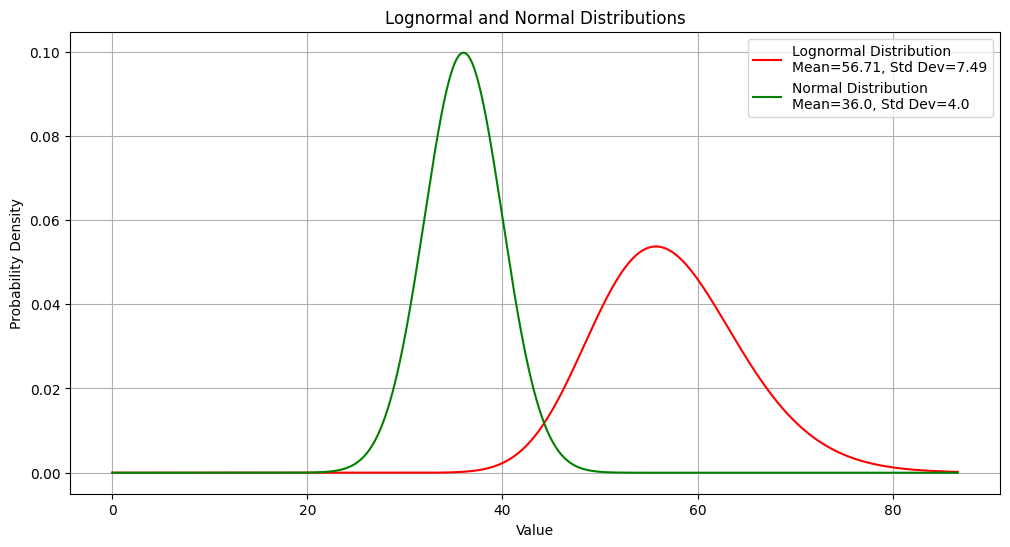

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

# Constant Parameters
Wel=214 #cm^3
L=200 #cm

# Parameters for the lognormal distribution (R:fy*Wel)
lognormal_mean = 26.5*Wel/100       #average resistance moment in kNm
lognormal_std_dev = 2.5*Wel/100     #std of resistance moment in kNm

# Calculate scale and shape (sigma) for the lognormal distribution
mu = np.log(lognormal_mean)  # Natural logarithm of the mean
sigma = lognormal_std_dev / lognormal_mean  # Approximation for the standard deviation as a fraction of the mean

# Generate x values for the lognormal distribution above the absolute minimum
x = np.linspace(0, lognormal_mean + 4 * lognormal_std_dev, 1000)

# Create the lognormal distribution (R:fy*W)
lognormal_pdf = lognorm.pdf(x, sigma, scale=np.exp(mu))

# Parameters for the normal distribution (S: P)
normal_mean = 18*L/100              #Force times cantilever -> avg. load moment in kNm
normal_std_dev = 2*L/100            #Force times cantilever -> std. load moment in kNm

# Create the pdfs
pdf_R = lognorm.pdf(x, sigma, scale=np.exp(mu))
pdf_S = norm.pdf(x, loc=normal_mean, scale=normal_std_dev)

# Plot the distributions
plt.figure(figsize=(12, 6))
plt.plot(x, pdf_R, label=f'Lognormal Distribution\nMean={lognormal_mean}, Std Dev={lognormal_std_dev}', color='red')
#plt.axvline(absolute_min, color='red', linestyle='--', label='Absolute Minimum (Lognormal)')
plt.plot(x, pdf_S, label=f'Normal Distribution\nMean={normal_mean}, Std Dev={normal_std_dev}', color='green')

# Title and labels
plt.title("Lognormal and Normal Distributions")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

#task:
#- modify the types of distribution. E.g. for the load an extreme value distribuition (type I), with the same values for avergae and standard deviation



## Calculation with numerical integration

This probability can be computed using the relationship between the CDFs of  R  and  S . Specifically, for a given value  x:

$P(R \leq S) = \int_{-\infty}^{\infty} F_R(x) \cdot f_S(x) \, dx$

which is the probability of failure.

Where:
- $F_R(x)$ : CDF of  R ,
- $f_S(x)$ : PDF of  S .


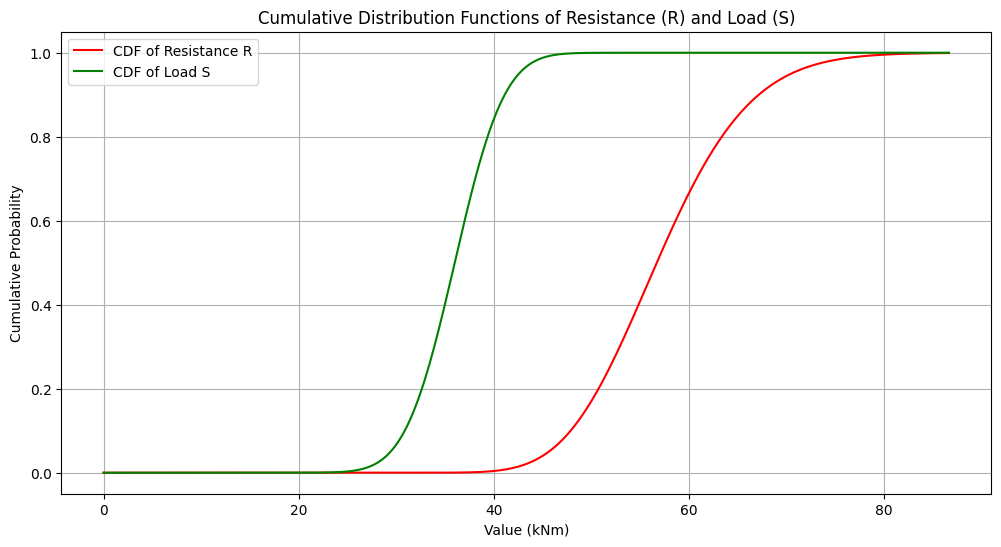

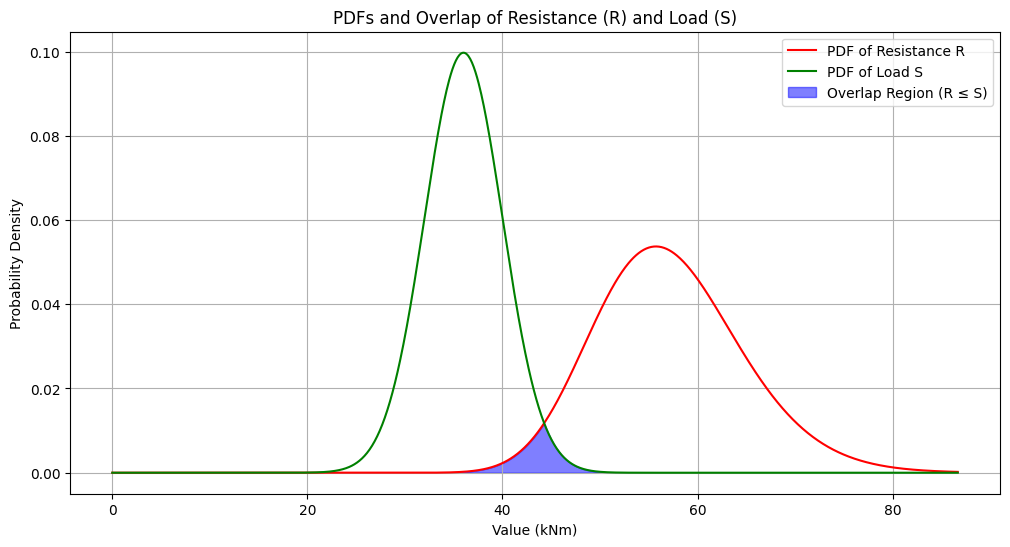

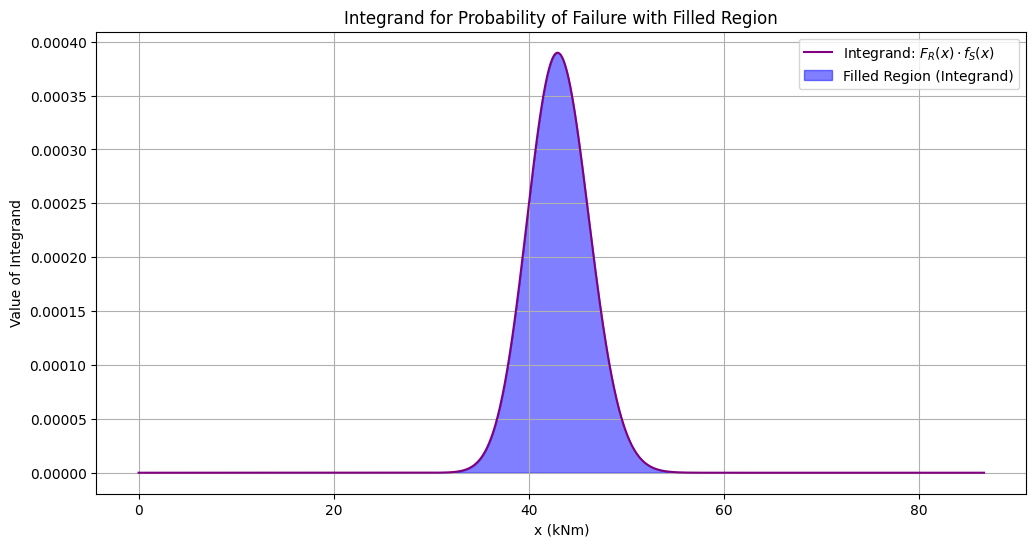

Probability of Failure (P(R ≤ S)): 0.0031


In [9]:
# Define the CDFs
def F_R(x):
    return lognorm.cdf(x, sigma, scale=np.exp(mu))

def f_S(x):
    return norm.pdf(x, loc=normal_mean, scale=normal_std_dev)


# Plot the CDFs
x = np.linspace(0, max(lognormal_mean + 4 * lognormal_std_dev, normal_mean + 4 * normal_std_dev), 1000)
plt.figure(figsize=(12, 6))
plt.plot(x, lognorm.cdf(x, sigma, scale=np.exp(mu)), label='CDF of Resistance R', color='red')
plt.plot(x, norm.cdf(x, loc=normal_mean, scale=normal_std_dev), label='CDF of Load S', color='green')

# Title and labels
plt.title("Cumulative Distribution Functions of Resistance (R) and Load (S)")
plt.xlabel("Value (kNm)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid()
plt.show()

# Calculate PDFs
pdf_R = lognorm.pdf(x, sigma, scale=np.exp(mu))
pdf_S = norm.pdf(x, loc=normal_mean, scale=normal_std_dev)

# Compute the overlap (minimum of the two PDFs)
overlap = np.minimum(pdf_R, pdf_S)

# Plot the distributions and their overlap
plt.figure(figsize=(12, 6))
plt.plot(x, pdf_R, label='PDF of Resistance R', color='red')
plt.plot(x, pdf_S, label='PDF of Load S', color='green')
plt.fill_between(x, overlap, color='blue', alpha=0.5, label='Overlap Region (R ≤ S)')

# Add title, labels, and legend
plt.title("PDFs and Overlap of Resistance (R) and Load (S)")
plt.xlabel("Value (kNm)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

#Integration
integrand = lambda x: F_R(x) * f_S(x)
x_test = np.linspace(0, max(lognormal_mean + 4 * lognormal_std_dev, normal_mean + 4 * normal_std_dev), 1000)
y_test = [integrand(x) for x in x_test]

# Plot the integrand with the filled region
plt.figure(figsize=(12, 6))
plt.plot(x_test, y_test, label=r'Integrand: $F_R(x) \cdot f_S(x)$', color='purple')
plt.fill_between(x_test, y_test, color='blue', alpha=0.5, label='Filled Region (Integrand)')
plt.title("Integrand for Probability of Failure with Filled Region")
plt.xlabel("x (kNm)")
plt.ylabel("Value of Integrand")
plt.legend()
plt.grid()
plt.show()

# Print the probability of failure
print(f"Probability of Failure (P(R ≤ S)): {np.sum(y_test)*(x_test[1]-x_test[0]) :.4f}")

## Calculation with Monte-Carlo Simulation

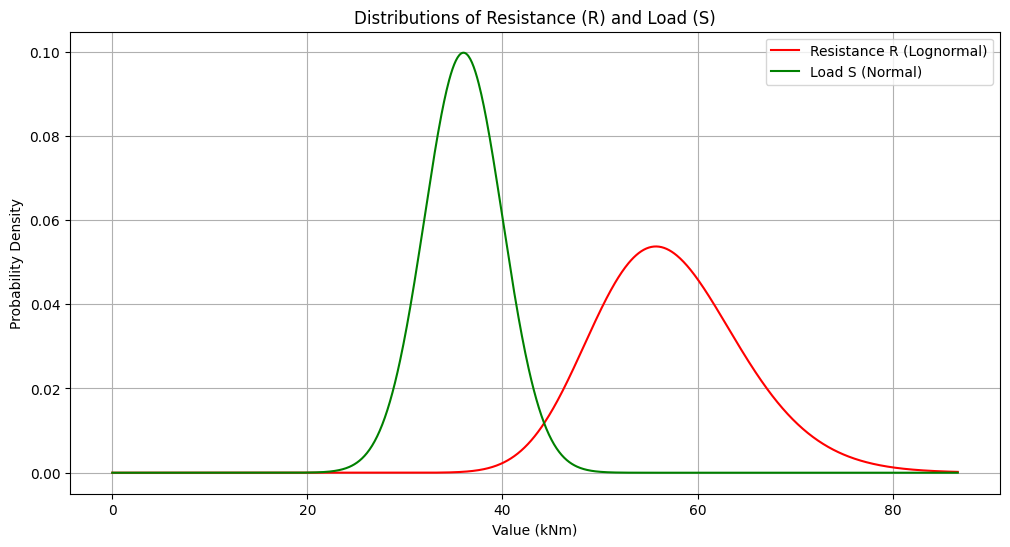

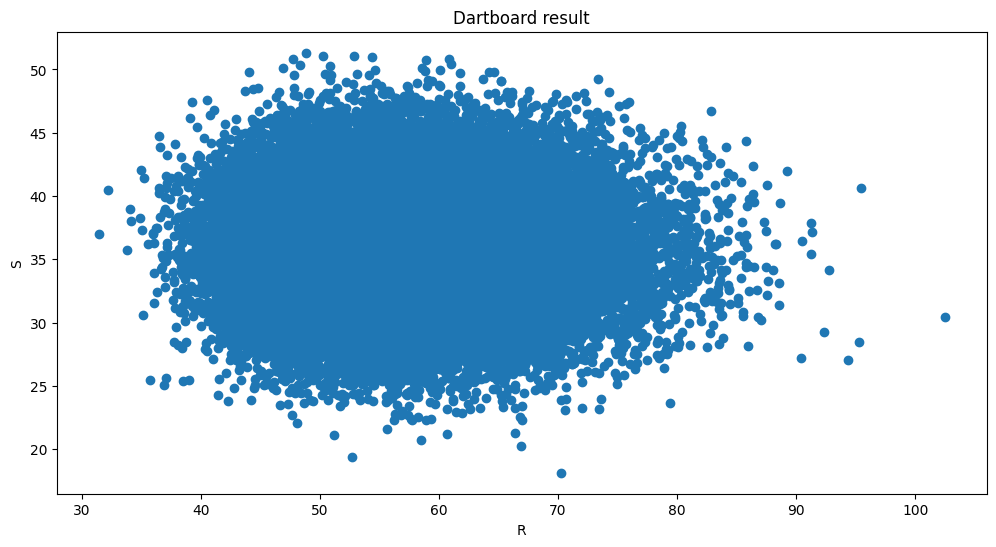

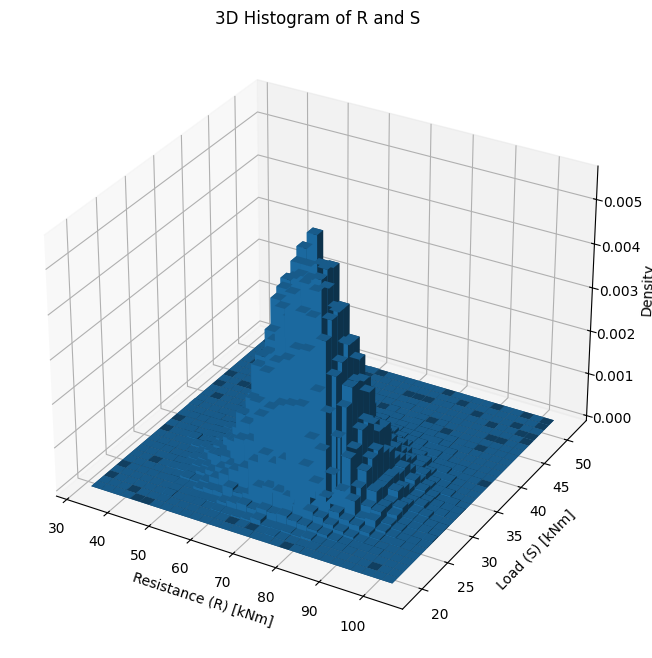

/tmp/ipykernel_28918/2808190564.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


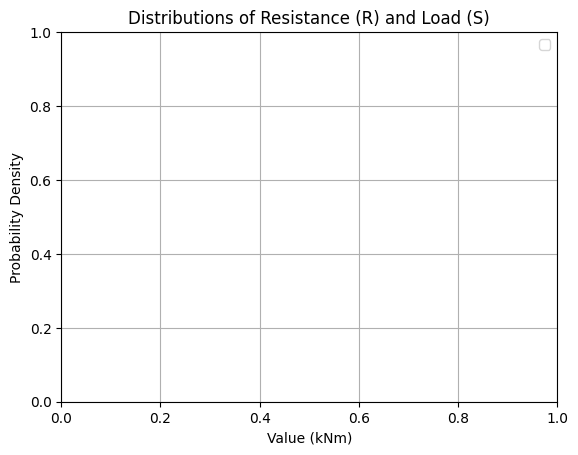

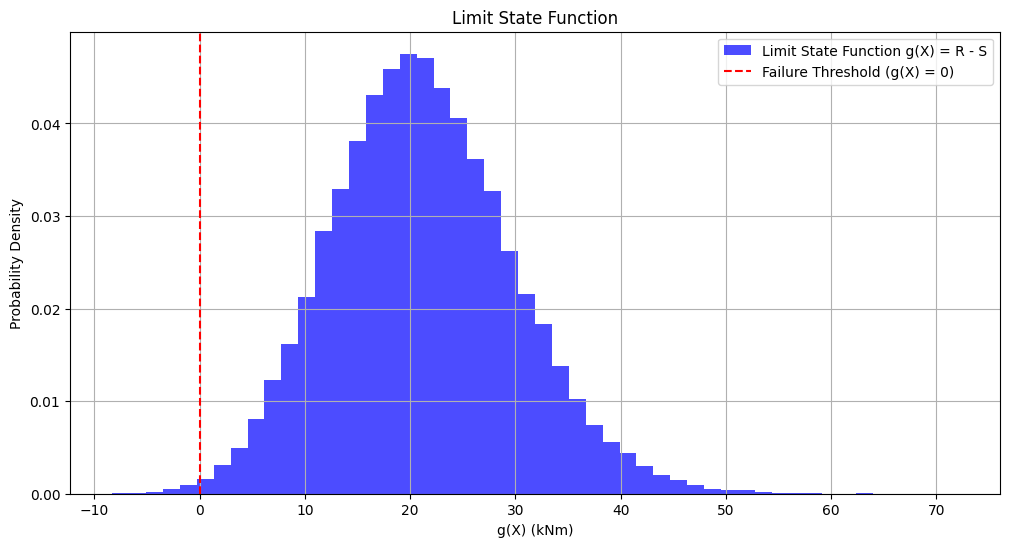

Probability of Failure: 0.0032


In [ ]:

# Generate random samples for resistance (R)
np.random.seed(42)  # For reproducibility
R_samples = lognorm.rvs(sigma, scale=np.exp(mu), size=50000)

# Generate random samples for load (S)
S_samples = norm.rvs(loc=normal_mean, scale=normal_std_dev, size=50000)

# Calculate the limit state function g(X) = R - S
g_samples = R_samples - S_samples

# Plot the distributions of R and S
plt.figure(figsize=(12, 6))
x = np.linspace(0, max(lognormal_mean + 4 * lognormal_std_dev, normal_mean + 4 * normal_std_dev), 1000)
plt.plot(x, lognorm.pdf(x, sigma, scale=np.exp(mu)), label='Resistance R (Lognormal)', color='red')
plt.plot(x, norm.pdf(x, loc=normal_mean, scale=normal_std_dev), label='Load S (Normal)', color='green')

plt.title("Distributions of Resistance (R) and Load (S)")
plt.xlabel("Value (kNm)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(R_samples,S_samples)
plt.title("Dartboard result")
plt.xlabel("R")
plt.ylabel("S")

# Create 2D histogram
hist, xedges, yedges = np.histogram2d(R_samples, S_samples, bins=30, density=True)

# Generate bin centers for the plot
xcenters = 0.5 * (xedges[:-1] + xedges[1:])
ycenters = 0.5 * (yedges[:-1] + yedges[1:])
xcenters, ycenters = np.meshgrid(xcenters, ycenters)

# Create a 3D histogram plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the bars
ax.bar3d(xcenters.ravel(), ycenters.ravel(), np.zeros_like(hist.ravel()), 
         xedges[1] - xedges[0], yedges[1] - yedges[0], hist.ravel(), shade=True, cmap="viridis")

# Add labels and title
ax.set_title("3D Histogram of R and S")
ax.set_xlabel("Resistance (R) [kNm]")
ax.set_ylabel("Load (S) [kNm]")
ax.set_zlabel("Density")
plt.show()

# Plot the histogram of the limit state function
plt.figure(figsize=(12, 6))
plt.hist(g_samples, bins=50, density=True, alpha=0.7, color='blue', label='Limit State Function g(X) = R - S')
plt.axvline(0, color='red', linestyle='--', label='Failure Threshold (g(X) = 0)')
plt.title("Limit State Function")
plt.xlabel("g(X) (kNm)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

# Calculate and print the probability of failure (g(X) <= 0)
failure_probability = np.mean(g_samples <= 0)
print(f"Probability of Failure: {failure_probability:.4f}")